In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

options = pd.read_csv("SPXoptions.csv")
spx = pd.read_csv("SPX.csv")
options

,Date,Strike,Maturity,Call,Put
0,2024-04-19,5400,2025-05-16,138.492113,422.048384
1,2024-04-19,5425,2025-05-16,170.531152,477.907934
2,2024-04-19,5500,2025-05-16,143.732805,522.571123
3,2024-04-22,5200,2025-05-16,277.593890,329.164359
4,2024-04-22,5225,2025-05-16,264.572999,339.972792
...,...,...,...,...,...
7783,2025-04-15,6000,2025-05-16,9.396478,599.037834
7784,2025-04-15,6025,2025-05-16,8.313458,622.859448
7785,2025-04-15,6050,2025-05-16,1.601048,641.051672
7786,2025-04-15,6075,2025-05-16,1.372591,665.727850


In [ ]:
spx

,Time,Last
0,2000-01-03,1455.22
1,2000-01-04,1399.42
2,2000-01-05,1402.11
3,2000-01-06,1403.45
4,2000-01-07,1441.47
...,...,...
6354,2025-04-09,5456.90
6355,2025-04-10,5268.05
6356,2025-04-11,5363.36
6357,2025-04-14,5405.97


In [ ]:
# prompt: for the relevant dates in Options and SPX match (i.e. where 'Date' column in options = 'Time'  in SPX ), add a column in the options data frame with the 'last' value, and then term this column 'S'

import pandas as pd
# Convert 'Date' and 'Time' columns to datetime objects
options['Date'] = pd.to_datetime(options['Date'])
spx['Time'] = pd.to_datetime(spx['Time'])

# Merge the two dataframes based on the date/time columns
merged_df = pd.merge(options, spx, left_on='Date', right_on='Time', how='inner')

# Extract the 'Last' column from the merged dataframe and add it to the original options dataframe
options['S'] = merged_df['Last']

# Assuming 'Maturity' column exists and is in datetime format
options['Maturity'] = pd.to_datetime(options['Maturity'])

# Calculate the difference in days between 'Date' and 'Maturity'
options['DaysToMaturity'] = (options['Maturity'] - options['Date']).dt.days
options['T'] = options['DaysToMaturity'] / 365
options['r'] = 0.045
options

,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r
0,2024-04-19,5400,2025-05-16,138.492113,422.048384,4967.23,392,1.073973,0.045
1,2024-04-19,5425,2025-05-16,170.531152,477.907934,4967.23,392,1.073973,0.045
2,2024-04-19,5500,2025-05-16,143.732805,522.571123,4967.23,392,1.073973,0.045
3,2024-04-22,5200,2025-05-16,277.593890,329.164359,5010.60,389,1.065753,0.045
4,2024-04-22,5225,2025-05-16,264.572999,339.972792,5010.60,389,1.065753,0.045
...,...,...,...,...,...,...,...,...,...
7783,2025-04-15,6000,2025-05-16,9.396478,599.037834,5396.63,31,0.084932,0.045
7784,2025-04-15,6025,2025-05-16,8.313458,622.859448,5396.63,31,0.084932,0.045
7785,2025-04-15,6050,2025-05-16,1.601048,641.051672,5396.63,31,0.084932,0.045
7786,2025-04-15,6075,2025-05-16,1.372591,665.727850,5396.63,31,0.084932,0.045


In [ ]:
# Assuming 'Call', 'Put', 'Strike', 'S', 'T', and 'r' columns exist in the 'options' DataFrame
# using PCP: C - P = S*e(-q*T) - K*e(-r*T)
#S*e(-q*T) = C - P + K*e(-r*T)
# e(-q*T) = (C-P + K*e(-r*T)/S)
# taking log of both sides
# -q*T = ln((C-P + K*e(-r*T)/S)
# q = -1/T * ln((C-P + K*e(-r*T)/S)

options['q'] = -1 / options['T'] * np.log((options['Call'] - options['Put'] + options['Strike'] * np.exp(-options['r'] * options['T'])) / options['S'])


In [ ]:
options1 = options.copy() # use this for later
options1


,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r,q
0,2024-04-19,5400,2025-05-16,138.492113,422.048384,4967.23,392,1.073973,0.045,0.02
1,2024-04-19,5425,2025-05-16,170.531152,477.907934,4967.23,392,1.073973,0.045,0.02
2,2024-04-19,5500,2025-05-16,143.732805,522.571123,4967.23,392,1.073973,0.045,0.02
3,2024-04-22,5200,2025-05-16,277.593890,329.164359,5010.60,389,1.065753,0.045,0.02
4,2024-04-22,5225,2025-05-16,264.572999,339.972792,5010.60,389,1.065753,0.045,0.02
...,...,...,...,...,...,...,...,...,...,...
7783,2025-04-15,6000,2025-05-16,9.396478,599.037834,5396.63,31,0.084932,0.045,0.02
7784,2025-04-15,6025,2025-05-16,8.313458,622.859448,5396.63,31,0.084932,0.045,0.02
7785,2025-04-15,6050,2025-05-16,1.601048,641.051672,5396.63,31,0.084932,0.045,0.02
7786,2025-04-15,6075,2025-05-16,1.372591,665.727850,5396.63,31,0.084932,0.045,0.02


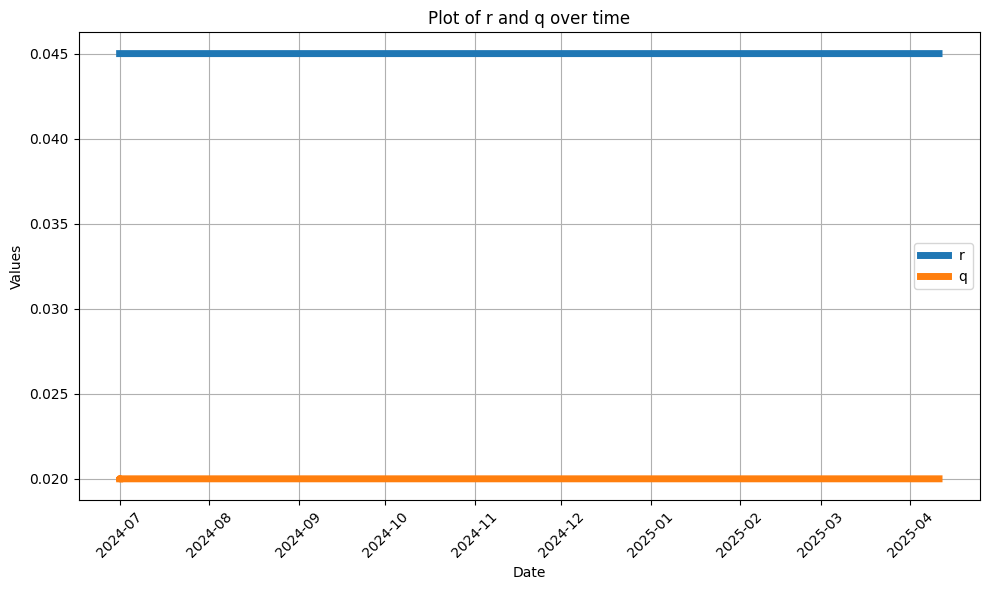

In [ ]:
# prompt: how do i plot r and q with Date?

import matplotlib.pyplot as plt

# Assuming 'Date', 'r', and 'q' columns exist in the 'options' DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(options['Date'], options['r'], label='r', lw=5)
plt.plot(options['Date'], options['q'], label='q',lw=5)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of r and q over time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
#Q1 the answer is 2% continuously compounded dividend yield

In [ ]:
#Q2
# first we need to calculate forward prices for every day that we enter into a butterfly strategy (1/07/24 - 11/04/25)
# this will help us find the middle strike which is ATMF (i.e. the strike that is closest to the forward price)
# option maturity is 16 May 25

r = 0.045
q = 0.02
daycount = 365
maturity_date = pd.to_datetime('2025-05-16')

start_date = pd.to_datetime('2024-07-01')
end_date = pd.to_datetime('2025-04-11')
spx1 = spx[(spx['Time'] >= start_date) & (spx['Time'] <= end_date)].copy() # filter data for relevant dates
spx1['T - t'] = (maturity_date - spx1['Time']).dt.days # need to rename?
spx1 = spx1.rename(columns={spx1.columns[-2]: 'S'})
spx1['Days/365'] = spx1['T - t']/daycount # need to rename?
spx1['exp(-q*(T-t))'] = np.exp(-q * spx1['Days/365'])
spx1['DF'] = np.exp(-r * spx1['Days/365'])

# forward price is equal to: (S * exp(-q*(T-t))/DF(t,T)
spx1['Forward Price'] = spx1['S'] * spx1['exp(-q*(T-t))']/spx1['DF']
spx1

# The forward price must reflect the cost of carrying the asset until the future date
# also note that the forward price converges toward spot price as time to maturity decreases



,Time,S,T - t,Days/365,exp(-q*(T-t)),DF,Forward Price
6160,2024-07-01,5475.09,319,0.873973,0.982672,0.961435,5596.033420
6161,2024-07-02,5509.01,318,0.871233,0.982726,0.961553,5630.317054
6162,2024-07-03,5537.02,317,0.868493,0.982780,0.961672,5658.556241
6163,2024-07-05,5567.19,315,0.863014,0.982888,0.961909,5688.609151
6164,2024-07-08,5572.85,312,0.854795,0.983049,0.962265,5693.222634
...,...,...,...,...,...,...,...
6352,2025-04-07,5062.25,39,0.106849,0.997865,0.995203,5075.790526
6353,2025-04-08,4982.77,38,0.104110,0.997920,0.995326,4995.755745
6354,2025-04-09,5456.90,37,0.101370,0.997975,0.995449,5470.746668
6355,2025-04-10,5268.05,36,0.098630,0.998029,0.995571,5281.055740


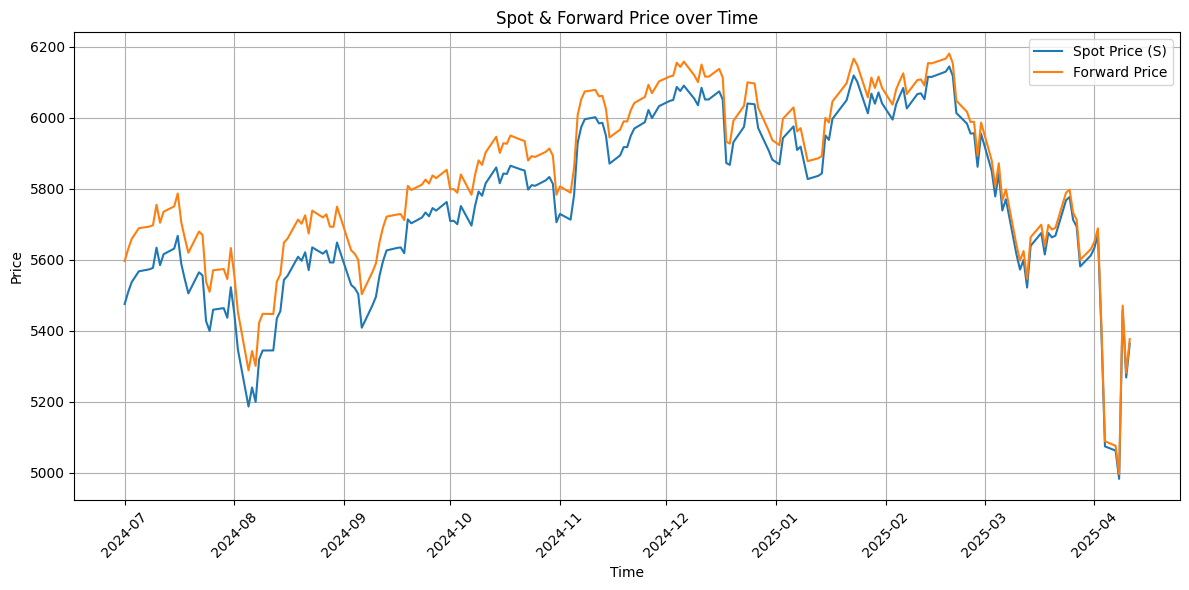

In [ ]:
# show convergence

plt.figure(figsize=(12, 6))

plt.plot(spx1['Time'], spx1['S'], label='Spot Price (S)')
plt.plot(spx1['Time'], spx1['Forward Price'], label='Forward Price')

# Assuming you want to plot time on the x-axis
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Spot & Forward Price over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# bring the forward price data to the options df

spx1['Time'] = pd.to_datetime(spx1['Time'])  # Ensure Time is in datetime format
options['Date'] = pd.to_datetime(options['Date'])  # Ensure Date is in datetime format

# Merge 'Forward Price' from spx1 into options based on the date. Need to change name
options = pd.merge(options, spx1[['Time', 'Forward Price']], left_on='Date', right_on='Time', how='inner')

# Drop the redundant 'Time' column
options = options.drop('Time', axis=1)

options

,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r,q,Forward Price
0,2024-07-01,5200,2025-05-16,547.385738,166.625517,5475.09,319,0.873973,0.045,0.02,5596.033420
1,2024-07-01,5225,2025-05-16,528.670881,171.946524,5475.09,319,0.873973,0.045,0.02,5596.033420
2,2024-07-01,5250,2025-05-16,509.961268,177.272776,5475.09,319,0.873973,0.045,0.02,5596.033420
3,2024-07-01,5275,2025-05-16,491.436670,182.784042,5475.09,319,0.873973,0.045,0.02,5596.033420
4,2024-07-01,5350,2025-05-16,437.049580,200.504544,5475.09,319,0.873973,0.045,0.02,5596.033420
...,...,...,...,...,...,...,...,...,...,...,...
6654,2025-04-11,6000,2025-05-16,5.725324,626.806731,5363.36,35,0.095890,0.045,0.02,5376.232793
6655,2025-04-11,6025,2025-05-16,5.558545,651.532308,5363.36,35,0.095890,0.045,0.02,5376.232793
6656,2025-04-11,6050,2025-05-16,3.742475,674.608594,5363.36,35,0.095890,0.045,0.02,5376.232793
6657,2025-04-11,6075,2025-05-16,3.154529,698.913004,5363.36,35,0.095890,0.045,0.02,5376.232793


In [ ]:
options[50:70]

,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r,q,Forward Price
50,2024-07-02,5675,2025-05-16,236.384220,279.349246,5509.01,318,0.871233,0.045,0.02,5630.317054
51,2024-07-02,5700,2025-05-16,218.697135,285.700988,5509.01,318,0.871233,0.045,0.02,5630.317054
52,2024-07-02,5725,2025-05-16,201.598152,292.640834,5509.01,318,0.871233,0.045,0.02,5630.317054
53,2024-07-02,5750,2025-05-16,184.517949,299.599458,5509.01,318,0.871233,0.045,0.02,5630.317054
54,2024-07-02,5775,2025-05-16,165.718112,304.838449,5509.01,318,0.871233,0.045,0.02,5630.317054
55,2024-07-02,5800,2025-05-16,145.512958,308.672123,5509.01,318,0.871233,0.045,0.02,5630.317054
56,2024-07-02,5825,2025-05-16,117.197664,304.395656,5509.01,318,0.871233,0.045,0.02,5630.317054
57,2024-07-02,5850,2025-05-16,153.191360,364.428180,5509.01,318,0.871233,0.045,0.02,5630.317054
58,2024-07-02,5875,2025-05-16,143.359734,378.635382,5509.01,318,0.871233,0.045,0.02,5630.317054
59,2024-07-02,5900,2025-05-16,133.721695,393.036170,5509.01,318,0.871233,0.045,0.02,5630.317054


In [ ]:
# prompt: for each date in options, enter into a long butterfly strategy with the middle strike being the closest to the forward price on that date. then take the end strikes to be 100 points lower and higher than that. find the cost of this as Call (K1 ) - 2 * call (K2) + Call(K3)

import pandas as pd
# Find the closest strike price to the forward price for each date
def find_closest_strike(forward_price, strikes):
    return min(strikes, key=lambda x: abs(x - forward_price))

# Calculate the butterfly strategy cost
def butterfly_cost(k1_price, k2_price, k3_price):
    return k1_price - 2 * k2_price + k3_price

# Assuming 'options' DataFrame has columns 'Date', 'Strike', 'Call', and 'Forward Price'
butterfly_costs = []
for date in options['Date'].unique():
    date_options = options[options['Date'] == date]
    forward_price = date_options['Forward Price'].iloc[0]  # Get the forward price
    available_strikes = date_options['Strike'].unique()

    middle_strike = find_closest_strike(forward_price, available_strikes)

    # Find K1 and K3 (100 points away from K2)
    k1 = middle_strike - 100
    k3 = middle_strike + 100

    # Check if K1 and K3 are available strikes
    if k1 in available_strikes and k3 in available_strikes:
        k1_price = date_options[date_options['Strike'] == k1]['Call'].iloc[0]
        k2_price = date_options[date_options['Strike'] == middle_strike]['Call'].iloc[0]
        k3_price = date_options[date_options['Strike'] == k3]['Call'].iloc[0]

        cost = butterfly_cost(k1_price, k2_price, k3_price)
        butterfly_costs.append({'Date': date, 'Cost': cost, 'K1': k1, 'K2': middle_strike, 'K3': k3})
    else:
        print(f"Skipping date {date}: K1 or K3 strike not available.")

butterfly_df = pd.DataFrame(butterfly_costs)
butterfly_df


Skipping date 2024-08-05 00:00:00: K1 or K3 strike not available.
Skipping date 2024-08-07 00:00:00: K1 or K3 strike not available.
Skipping date 2024-08-08 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-07 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-08 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-11 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-12 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-13 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-14 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-21 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-22 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-25 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-26 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-27 00:00:00: K1 or K3 strike not available.
Skipping date 2024-11-29 00:00:00: K1 or K3 strike not available.
Skipping d

,Date,Cost,K1,K2,K3
0,2024-07-01,-0.388256,5500,5600,5700
1,2024-07-02,0.108717,5525,5625,5725
2,2024-07-05,0.531384,5600,5700,5800
3,2024-07-08,0.023713,5600,5700,5800
4,2024-07-09,1.991953,5600,5700,5800
...,...,...,...,...,...
127,2025-03-31,9.620574,5525,5625,5725
128,2025-04-01,9.660756,5550,5650,5750
129,2025-04-02,10.409264,5600,5700,5800
130,2025-04-09,2.931964,5375,5475,5575


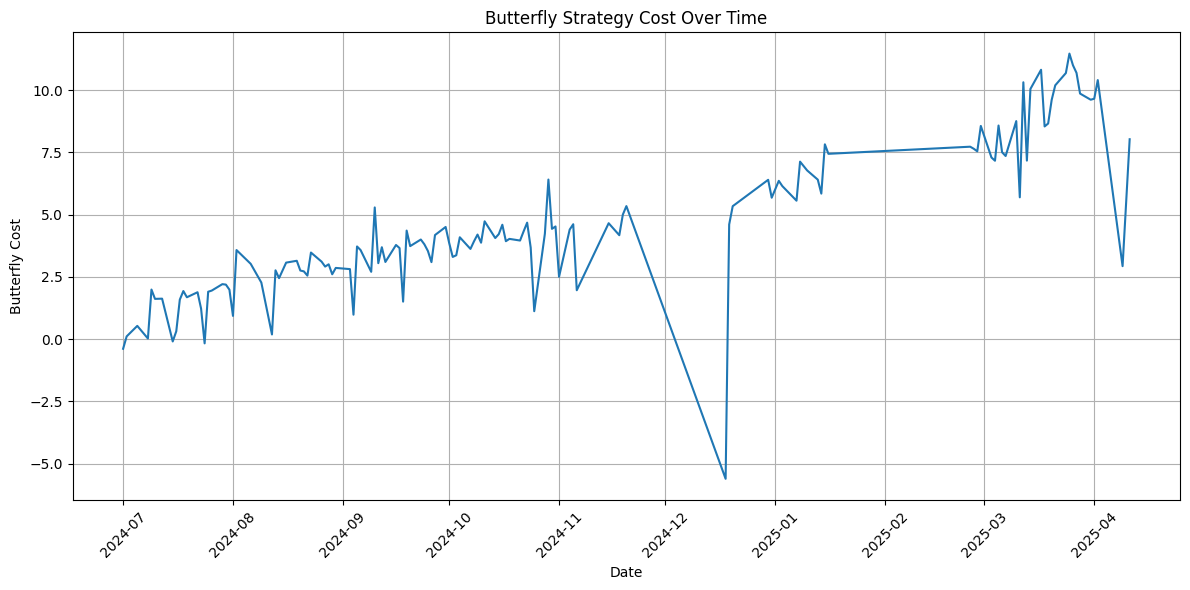

In [ ]:
# prompt: how do i plot date and cost for the above butterfly_df

import matplotlib.pyplot as plt

# Assuming butterfly_df has 'Date' and 'Cost' columns
plt.figure(figsize=(12, 6))
plt.plot(butterfly_df['Date'], butterfly_df['Cost'])
plt.xlabel('Date')
plt.ylabel('Butterfly Cost')
plt.title('Butterfly Strategy Cost Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


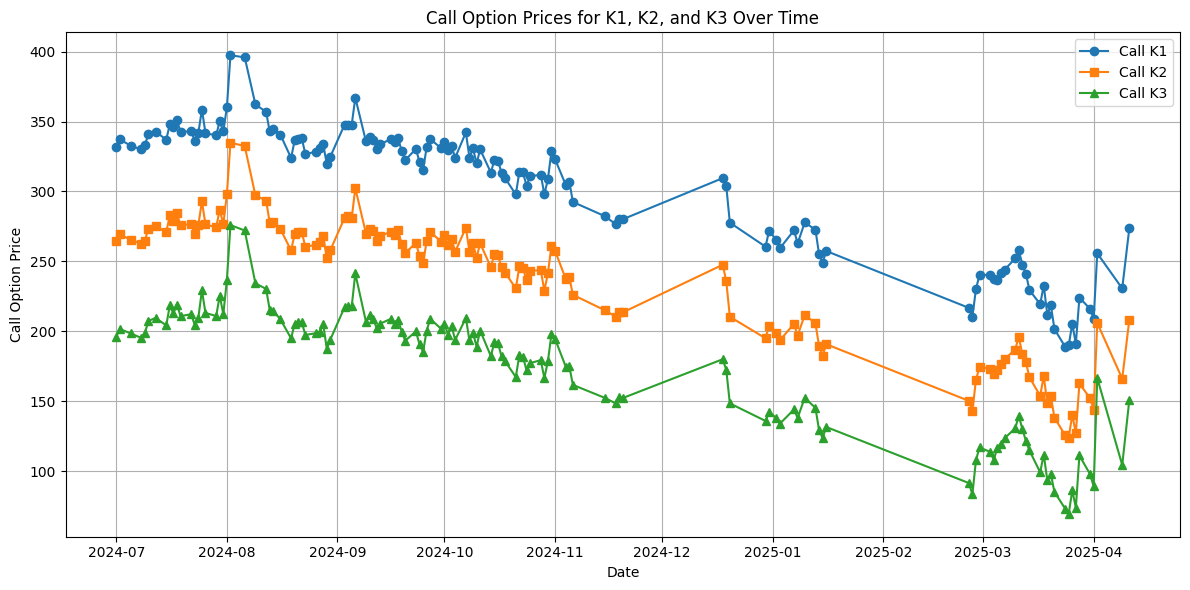

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date columns are datetime
options['Date'] = pd.to_datetime(options['Date'])
butterfly_df['Date'] = pd.to_datetime(butterfly_df['Date'])

# Merge call prices for K1, K2, K3
def get_call_price(date, strike):
    match = options[(options['Date'] == date) & (options['Strike'] == strike)]
    return match['Call'].values[0] if not match.empty else None

# Apply for each row
butterfly_df['Call_K1'] = butterfly_df.apply(lambda row: get_call_price(row['Date'], row['K1']), axis=1)
butterfly_df['Call_K2'] = butterfly_df.apply(lambda row: get_call_price(row['Date'], row['K2']), axis=1)
butterfly_df['Call_K3'] = butterfly_df.apply(lambda row: get_call_price(row['Date'], row['K3']), axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(butterfly_df['Date'], butterfly_df['Call_K1'], label='Call K1', marker='o')
plt.plot(butterfly_df['Date'], butterfly_df['Call_K2'], label='Call K2', marker='s')
plt.plot(butterfly_df['Date'], butterfly_df['Call_K3'], label='Call K3', marker='^')

plt.xlabel('Date')
plt.ylabel('Call Option Price')
plt.title('Call Option Prices for K1, K2, and K3 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

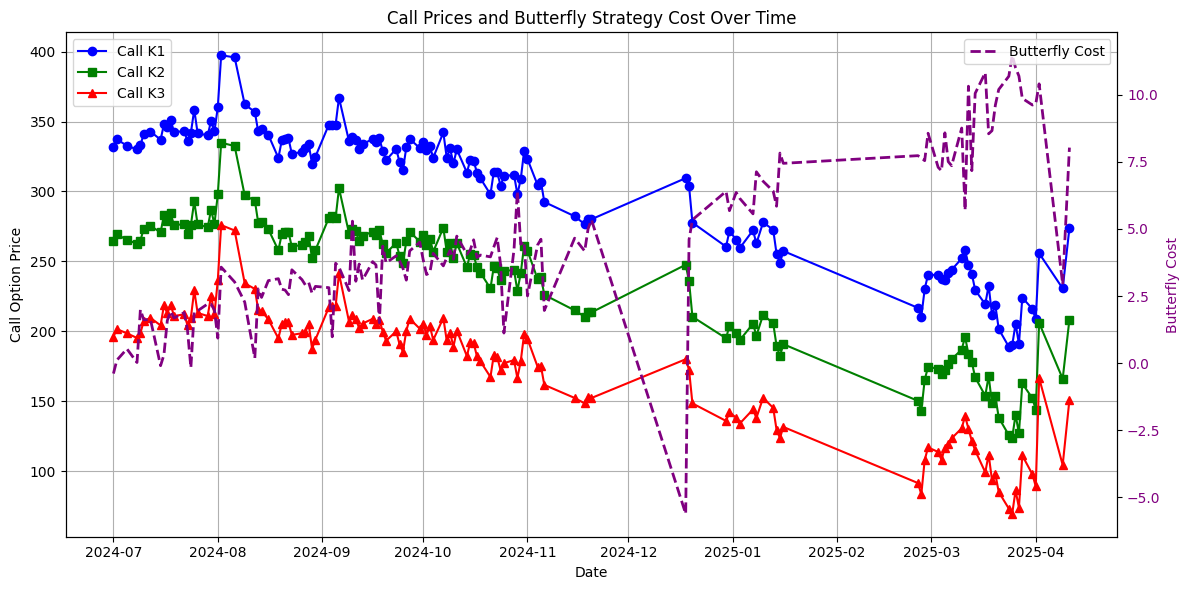

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Call prices on the left axis
ax1.plot(butterfly_df['Date'], butterfly_df['Call_K1'], label='Call K1', color='blue', marker='o')
ax1.plot(butterfly_df['Date'], butterfly_df['Call_K2'], label='Call K2', color='green', marker='s')
ax1.plot(butterfly_df['Date'], butterfly_df['Call_K3'], label='Call K3', color='red', marker='^')
ax1.set_xlabel('Date')
ax1.set_ylabel('Call Option Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create the second y-axis
ax2 = ax1.twinx()

# Plot Butterfly Cost on the right axis
ax2.plot(butterfly_df['Date'], butterfly_df['Cost'], label='Butterfly Cost', color='purple', linestyle='--', linewidth=2)
ax2.set_ylabel('Butterfly Cost', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

# Final layout
plt.title('Call Prices and Butterfly Strategy Cost Over Time')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

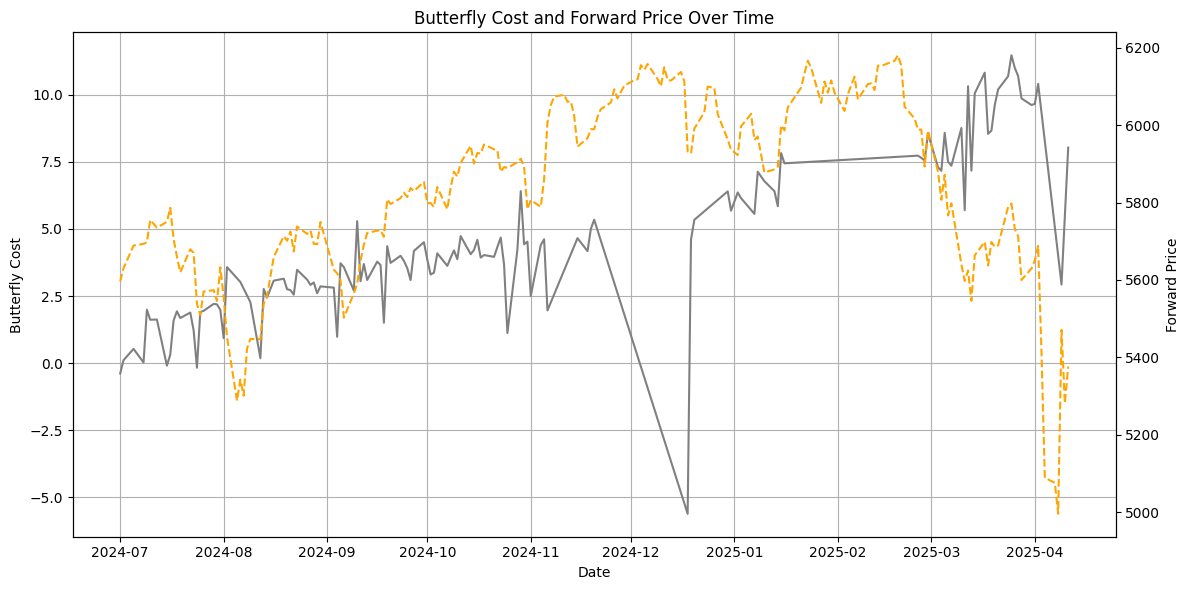

In [ ]:
# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: Butterfly Cost
ax1.plot(butterfly_df['Date'], butterfly_df['Cost'], label='Butterfly Cost', color='gray')
ax1.set_xlabel('Date')
ax1.set_ylabel('Butterfly Cost', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# Right axis: Forward Price
ax2 = ax1.twinx()
ax2.plot(options['Date'], options['Forward Price'], label='Forward Price', color='orange', linestyle='--')
ax2.set_ylabel('Forward Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and layout
plt.title('Butterfly Cost and Forward Price Over Time')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

In [ ]:
# Filter for 15-Apr-2025
filtered = options[options['Date'] == pd.Timestamp('2025-04-15')].copy()

# Sort by Strike ascending
filtered = filtered.sort_values('Strike').reset_index(drop=True)

# Check for increases in call price with increasing strike
filtered['Call_Diff'] = filtered['Call'].diff()
filtered['Strike_Diff'] = filtered['Strike'].diff()

# A violation occurs if Call price increases with increasing strike
violations = filtered[(filtered['Call_Diff'] > 0) & (filtered['Strike_Diff'] > 0)]

# Show violations
print(violations[['Date', 'Strike', 'Call', 'Call_Diff']])

Empty DataFrame
Columns: [Date, Strike, Call, Call_Diff]
Index: []


In [ ]:
# prompt: in butterfly_df do i check the min of the cost ? on what date? using what strikes?

min_cost = butterfly_df['Cost'].min()
min_cost_date = butterfly_df.loc[butterfly_df['Cost'].idxmin(), 'Date']
min_cost_k1 = butterfly_df.loc[butterfly_df['Cost'].idxmin(), 'K1']
min_cost_k2 = butterfly_df.loc[butterfly_df['Cost'].idxmin(), 'K2']
min_cost_k3 = butterfly_df.loc[butterfly_df['Cost'].idxmin(), 'K3']

print(f"Minimum Butterfly Cost: {min_cost}")
print(f"Date of Minimum Cost: {min_cost_date}")
print(f"Strikes at Minimum Cost: K1 = {min_cost_k1}, K2 = {min_cost_k2}, K3 = {min_cost_k3}")


Minimum Butterfly Cost: -5.614590964095015
Date of Minimum Cost: 2024-12-18 00:00:00
Strikes at Minimum Cost: K1 = 5825, K2 = 5925, K3 = 6025


In [ ]:
# prompt: how do i show all rows for butterfly_df

import pandas as pd
pd.reset_option("display.max_rows", None)
butterfly_df


,Date,Cost,K1,K2,K3
0,2024-07-01,-0.388256,5500,5600,5700
1,2024-07-02,0.108717,5525,5625,5725
2,2024-07-05,0.531384,5600,5700,5800
3,2024-07-08,0.023713,5600,5700,5800
4,2024-07-09,1.991953,5600,5700,5800
...,...,...,...,...,...
127,2025-03-31,9.620574,5525,5625,5725
128,2025-04-01,9.660756,5550,5650,5750
129,2025-04-02,10.409264,5600,5700,5800
130,2025-04-09,2.931964,5375,5475,5575


In [ ]:
# reasons for the above chart
# 1. asynchronicity - prices are recorded at different times throughout the day, so you do not have any uniform way of comparison.
# ideally the most effective way would be to backtest at the same time each day as spot and forward prices change in between the observations
# 2. so you are striking the call fly atmf, which is max profit. as your time to maturity shortens,
# if stock prices exhibit very little volatility then you will realise this profit. think about it for the
# 1 day to expiry call fly struck at max profit. obviously this will cost the most as if there is no big move in stock prices then you can realise the profit
# holding all else equal. that's why there is a general upward trend in the graph to the shortest expiries
# 3. the 2nd atmf option you are short x 2 decays more rapidly as it approaches maturity. which means that its premium for the 2nd option
# you are selling premium decreases faster than K1 and K3
# as a result the butterfly cost increases





In [ ]:
# prompt: show me the forward price dates in spx1 not used in options

# Assuming spx1 DataFrame has 'Time' and 'Forward Price' columns
# and options DataFrame has 'Date' column.

# Find dates in spx1 that are NOT present in the 'Date' column of options
forward_price_dates_not_in_options = spx1[~spx1['Time'].isin(options['Date'])]['Time']

forward_price_dates_not_in_options


,Time
6162,2024-07-03
6167,2024-07-11
6192,2024-08-15


In [ ]:
#q3a) we need a test for monotonicity.

options1['Date'] = pd.to_datetime(options1['Date'])
april15options1 = options1[options1['Date'] == '2025-04-15']
april15options1



,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r,q
7753,2025-04-15,5200,2025-05-16,301.809537,94.502592,5396.63,31,0.084932,0.045,0.02
7754,2025-04-15,5225,2025-05-16,282.974650,100.572339,5396.63,31,0.084932,0.045,0.02
7755,2025-04-15,5250,2025-05-16,264.542197,107.044520,5396.63,31,0.084932,0.045,0.02
7756,2025-04-15,5275,2025-05-16,246.478562,113.885520,5396.63,31,0.084932,0.045,0.02
7757,2025-04-15,5350,2025-05-16,194.803920,136.924781,5396.63,31,0.084932,0.045,0.02
7758,2025-04-15,5375,2025-05-16,178.591587,145.617083,5396.63,31,0.084932,0.045,0.02
7759,2025-04-15,5400,2025-05-16,161.946400,153.876529,5396.63,31,0.084932,0.045,0.02
7760,2025-04-15,5425,2025-05-16,147.651330,164.486094,5396.63,31,0.084932,0.045,0.02
7761,2025-04-15,5450,2025-05-16,133.051110,174.790508,5396.63,31,0.084932,0.045,0.02
7762,2025-04-15,5475,2025-05-16,119.180264,185.824297,5396.63,31,0.084932,0.045,0.02


Monotonicity violations found for call option prices on 2025-04-15:
      Strike       Call  Call_Price_Diff
7775    5800  10.996357         0.248600
7776    5825  20.672743         9.676386


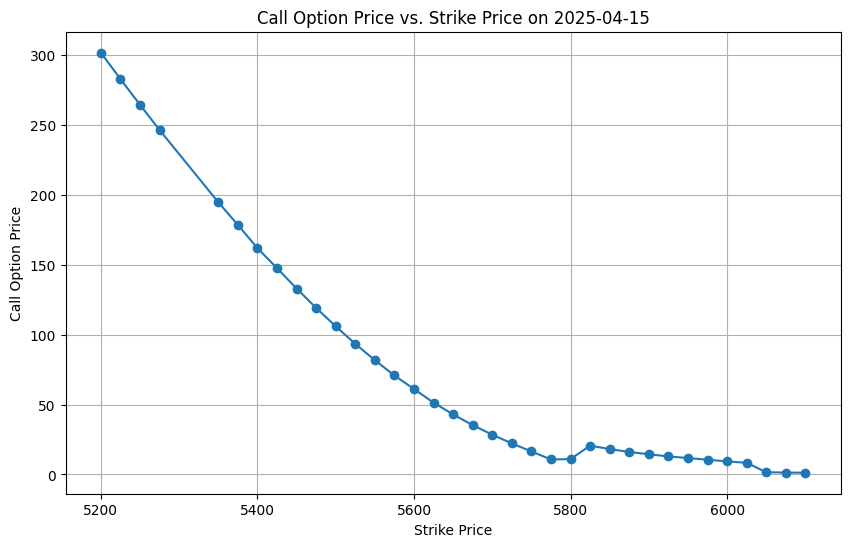

In [ ]:
# prompt: for the april15options1 df, how do i test that as strike increases, price of call decreases? (monotonicty). plot

import matplotlib.pyplot as plt
# Sort the DataFrame by 'Strike' to ensure monotonicity check is valid
april15options1_sorted = april15options1.sort_values('Strike')

# Check if 'Call' price is non-increasing as 'Strike' increases
# We can use the diff() method to compare consecutive rows
# If diff() is negative or zero, it's consistent with monotonicity
# If diff() is positive, it's a violation of the expected monotonicity

# Calculate the difference between consecutive call prices
april15options1_sorted['Call_Price_Diff'] = april15options1_sorted['Call'].diff()

# Identify rows where the difference is positive (violation of monotonicity)
monotonicity_violations = april15options1_sorted[april15options1_sorted['Call_Price_Diff'] > 0]

# Print the violations
if monotonicity_violations.empty:
  print("The call option prices for 2025-04-15 are monotonically decreasing with increasing strike.")
else:
  print("Monotonicity violations found for call option prices on 2025-04-15:")
  print(monotonicity_violations[['Strike', 'Call', 'Call_Price_Diff']])

# Plot the Call price against Strike for visual inspection
plt.figure(figsize=(10, 6))
plt.plot(april15options1_sorted['Strike'], april15options1_sorted['Call'], marker='o', linestyle='-')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs. Strike Price on 2025-04-15')
plt.grid(True)
plt.show()

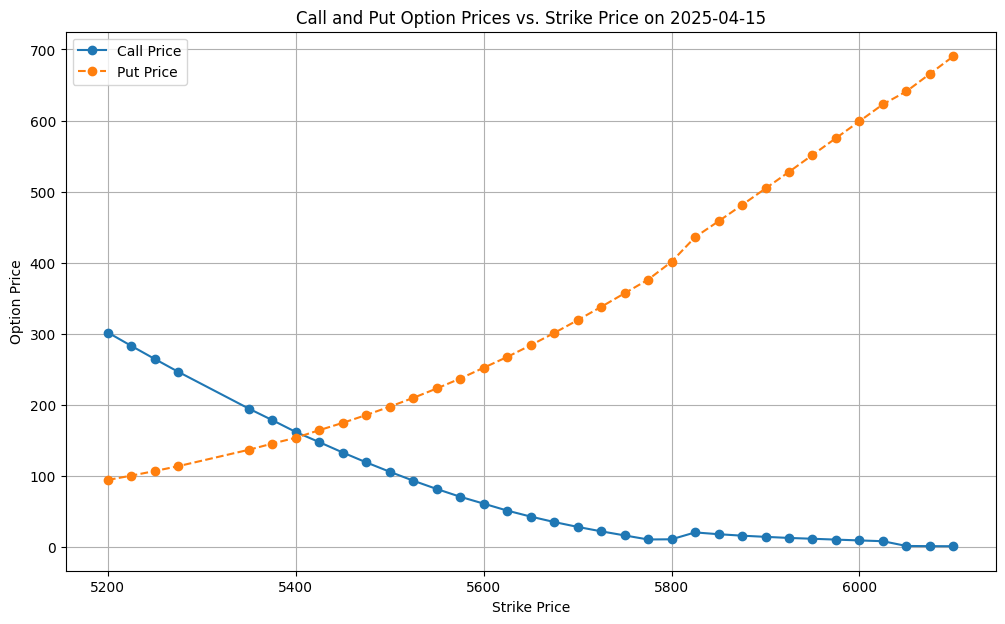

In [ ]:
# prompt: in april15options1, how would i plot call and put prices against strike on the same graph?

import matplotlib.pyplot as plt
# Filter the data for 2025-04-15
april15options1 = options1[options1['Date'] == '2025-04-15'].copy()

# Sort by Strike for plotting
april15options1_sorted = april15options1.sort_values('Strike')

# Plotting Call and Put prices against Strike
plt.figure(figsize=(12, 7))

plt.plot(april15options1_sorted['Strike'], april15options1_sorted['Call'], marker='o', linestyle='-', label='Call Price')
plt.plot(april15options1_sorted['Strike'], april15options1_sorted['Put'], marker='o', linestyle='--', label='Put Price')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Call and Put Option Prices vs. Strike Price on 2025-04-15')
plt.legend()
plt.grid(True)
plt.show()


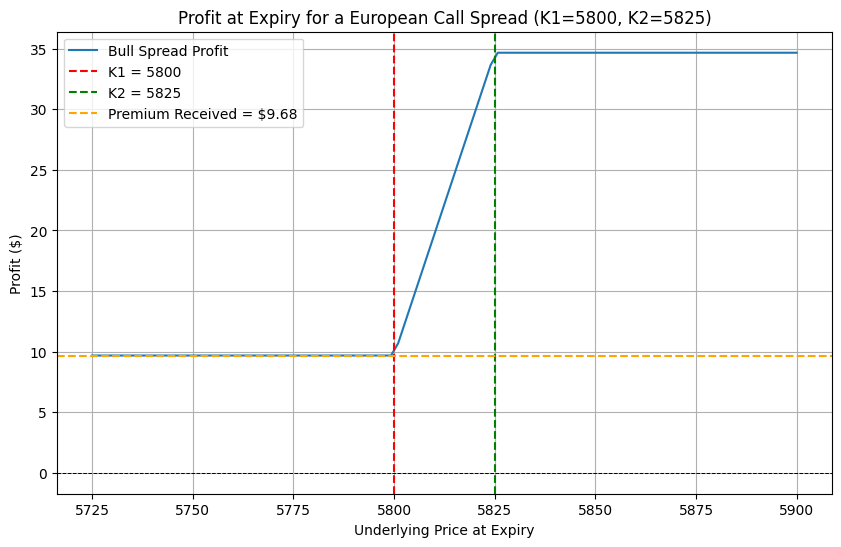

In [ ]:
K1 = 5800
K2 = 5825

priceK1 = april15options1[april15options1['Strike'] == K1]['Call'].iloc[0]
priceK2 = april15options1[april15options1['Strike'] == K2]['Call'].iloc[0]

#net premium paid for the call spread
premium_paid = priceK1 - priceK2

# Define a range of possible underlying prices at expiry
S = np.linspace(5725, 5900, 100)

profit = np.maximum(S - K1,0) - np.maximum(S - K2,0) - premium_paid

# Plotting the payoff diagram
plt.figure(figsize=(10, 6))
plt.plot(S, profit, label = "Bull Spread Profit")
plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Profit ($)')
plt.title('Profit at Expiry for a European Call Spread (K1=5800, K2=5825)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Add a line at zero profit
plt.axvline(K1, color='red', linestyle='dashed', label=f'K1 = {K1}')
plt.axvline(K2, color='green', linestyle='dashed', label=f'K2 = {K2}')
plt.axhline(premium_paid*-1, color='orange', linestyle='dashed', label=f'Premium Received = ${round(premium_paid*-1,2)}')
plt.legend()
plt.show()


In [ ]:
# prompt: in april15options1, how would i iterate and check the convexity condition that C(K1) - 2*C(K2) + C(K3) >= 0 and show violations where this is < 0

import pandas as pd
# Check convexity condition: C(K1) - 2*C(K2) + C(K3) >= 0
# We need to iterate through possible sets of three strikes with equal spacing

violations_convexity = []

# Iterate through the sorted DataFrame to find sets of three strikes
for i in range(len(april15options1_sorted) - 2):
    k1_row = april15options1_sorted.iloc[i]
    k2_row = april15options1_sorted.iloc[i + 1]
    k3_row = april15options1_sorted.iloc[i + 2]

    k1 = k1_row['Strike']
    k2 = k2_row['Strike']
    k3 = k3_row['Strike']

    # Check if the strikes have equal spacing
    if (k2 - k1) == (k3 - k2):
        c1 = k1_row['Call']
        c2 = k2_row['Call']
        c3 = k3_row['Call']

        convexity_value = c1 - 2 * c2 + c3

        # Check for violation
        if convexity_value < 0:
            violations_convexity.append({
                'Date': k1_row['Date'],
                'K1': k1,
                'K2': k2,
                'K3': k3,
                'Call_K1': c1,
                'Call_K2': c2,
                'Call_K3': c3,
                'Convexity_Value': convexity_value
            })

# Convert violations to a DataFrame for better presentation
violations_convexity_df = pd.DataFrame(violations_convexity)

# Show violations
if violations_convexity_df.empty:
    print("\nNo convexity violations found for equally spaced strikes on 2025-04-15.")
else:
    print("\nConvexity violations found for equally spaced strikes on 2025-04-15 (C(K1) - 2*C(K2) + C(K3) < 0):")
    print(violations_convexity_df[['Date', 'K1', 'K2', 'K3', 'Call_K1', 'Call_K2', 'Call_K3', 'Convexity_Value']])

violations_convexity_df



Convexity violations found for equally spaced strikes on 2025-04-15 (C(K1) - 2*C(K2) + C(K3) < 0):
        Date    K1    K2    K3     Call_K1     Call_K2     Call_K3  \
0 2025-04-15  5350  5375  5400  194.803920  178.591587  161.946400   
1 2025-04-15  5400  5425  5450  161.946400  147.651330  133.051110   
2 2025-04-15  5575  5600  5625   70.836213   61.150064   51.381009   
3 2025-04-15  5800  5825  5850   10.996357   20.672743   18.161222   
4 2025-04-15  5925  5950  5975   12.909603   11.756650   10.551772   
5 2025-04-15  6000  6025  6050    9.396478    8.313458    1.601048   

   Convexity_Value  
0        -0.432854  
1        -0.305150  
2        -0.082907  
3       -12.187908  
4        -0.051925  
5        -5.629390  


,Date,K1,K2,K3,Call_K1,Call_K2,Call_K3,Convexity_Value
0,2025-04-15,5350,5375,5400,194.803920,178.591587,161.946400,-0.432854
1,2025-04-15,5400,5425,5450,161.946400,147.651330,133.051110,-0.305150
2,2025-04-15,5575,5600,5625,70.836213,61.150064,51.381009,-0.082907
3,2025-04-15,5800,5825,5850,10.996357,20.672743,18.161222,-12.187908
4,2025-04-15,5925,5950,5975,12.909603,11.756650,10.551772,-0.051925
5,2025-04-15,6000,6025,6050,9.396478,8.313458,1.601048,-5.629390


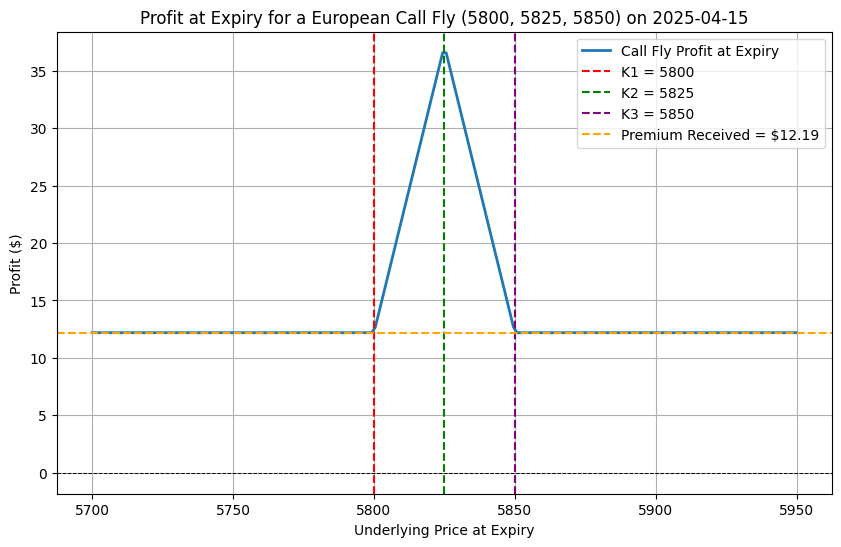

In [ ]:
# prompt: so for the call fly
# 2025-04-15	5800	5825	5850	10.996357	20.672743	18.161222	-12.187908
# how would i plot this profit diagram at expiry?

import matplotlib.pyplot as plt
import numpy as np
# The given call fly is on 2025-04-15 with strikes 5800, 5825, and 5850.
# This is not a standard butterfly where the middle strike is exactly in the middle.
# This is a custom combination of options.
# Let's define the strikes and the corresponding call prices from the data.

k1 = 5800
k2 = 5825
k3 = 5850

# Filter the options data for the specific date and strikes
april15_options_fly = april15options1[
    april15options1['Strike'].isin([k1, k2, k3])
].copy()

# Get the call prices for the specific strikes
call_k1 = april15_options_fly[april15_options_fly['Strike'] == k1]['Call'].iloc[0]
call_k2 = april15_options_fly[april15_options_fly['Strike'] == k2]['Call'].iloc[0]
call_k3 = april15_options_fly[april15_options_fly['Strike'] == k3]['Call'].iloc[0]

net_premium_paid = call_k1 - 2 * call_k2 + call_k3

# Define a range of possible underlying prices at expiry
S = np.linspace(5700, 5950, 200) # Extend the range for a better view of the tails

payoff = np.maximum(S - k1, 0) - 2 * np.maximum(S - k2, 0) + np.maximum(S - k3, 0)
profit = payoff - net_premium_paid

# Plotting the profit diagram
plt.figure(figsize=(10, 6))
plt.plot(S, profit, label='Call Fly Profit at Expiry',lw=2) # although not continuous ? may want to change

plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Profit ($)')
plt.title(f'Profit at Expiry for a European Call Fly ({k1}, {k2}, {k3}) on 2025-04-15')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Add a line at zero profit

# Add vertical lines for the strikes
plt.axvline(k1, color='red', linestyle='dashed', label=f'K1 = {k1}')
plt.axvline(k2, color='green', linestyle='dashed', label=f'K2 = {k2}')
plt.axvline(k3, color='purple', linestyle='dashed', label=f'K3 = {k3}')

# Add horizontal line for the max profit (at K2)
# Max profit = payoff at K2 - premium = (0 - 0 + 0) - premium = -premium_paid
plt.axhline(-net_premium_paid, color='orange', linestyle='dashed', label=f'Premium Received = ${round(-net_premium_paid, 2)}')


plt.legend()
plt.show()


In [ ]:
options1
april1options1 = options1[options1['Date'] == '2025-04-01'].copy()
april1options1


,Date,Strike,Maturity,Call,Put,S,DaysToMaturity,T,r,q
7403,2025-04-01,5200,2025-05-16,487.286956,39.320171,5633.07,45,0.123288,0.045,0.02
7404,2025-04-01,5225,2025-05-16,466.142552,43.037453,5633.07,45,0.123288,0.045,0.02
7405,2025-04-01,5250,2025-05-16,444.066024,45.822611,5633.07,45,0.123288,0.045,0.02
7406,2025-04-01,5275,2025-05-16,422.622346,49.240618,5633.07,45,0.123288,0.045,0.02
7407,2025-04-01,5350,2025-05-16,359.208040,60.411368,5633.07,45,0.123288,0.045,0.02
7408,2025-04-01,5375,2025-05-16,338.958384,65.023398,5633.07,45,0.123288,0.045,0.02
7409,2025-04-01,5400,2025-05-16,319.572008,70.498707,5633.07,45,0.123288,0.045,0.02
7410,2025-04-01,5425,2025-05-16,300.394581,76.182965,5633.07,45,0.123288,0.045,0.02
7411,2025-04-01,5450,2025-05-16,281.225251,81.875321,5633.07,45,0.123288,0.045,0.02
7412,2025-04-01,5475,2025-05-16,262.406486,87.918241,5633.07,45,0.123288,0.045,0.02


The call option prices for 2025-04-15 are monotonically decreasing with increasing strike.


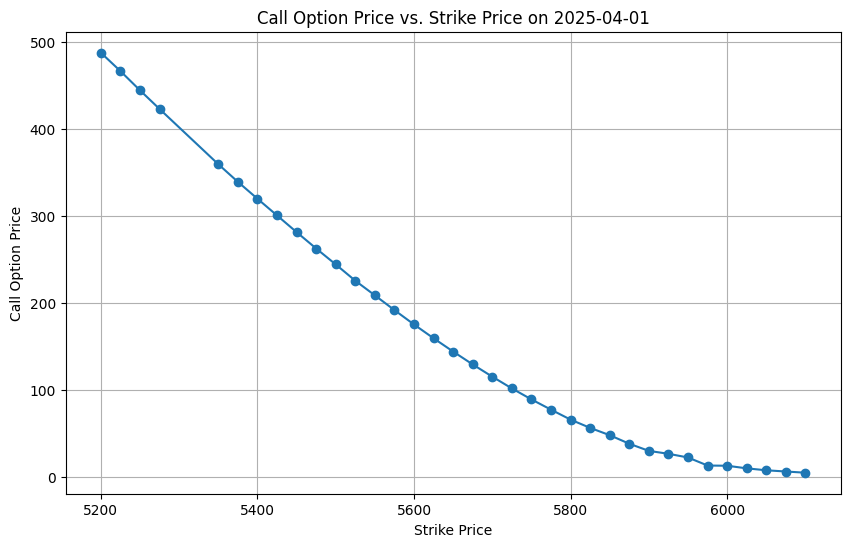

In [ ]:
april1options1_sorted = april1options1.sort_values('Strike')

# Check if 'Call' price is non-increasing as 'Strike' increases
# We can use the diff() method to compare consecutive rows
# If diff() is negative or zero, it's consistent with monotonicity
# If diff() is positive, it's a violation of the expected monotonicity

# Calculate the difference between consecutive call prices
april1options1_sorted['Call_Price_Diff'] = april1options1_sorted['Call'].diff()

# Identify rows where the difference is positive (violation of monotonicity)
monotonicity_violations = april1options1_sorted[april1options1_sorted['Call_Price_Diff'] > 0]

# Print the violations
if monotonicity_violations.empty:
  print("The call option prices for 2025-04-15 are monotonically decreasing with increasing strike.")
else:
  print("Monotonicity violations found for call option prices on 2025-04-15:")
  print(monotonicity_violations[['Strike', 'Call', 'Call_Price_Diff']])

# Plot the Call price against Strike for visual inspection
plt.figure(figsize=(10, 6))
plt.plot(april1options1_sorted['Strike'], april1options1_sorted['Call'], marker='o', linestyle='-')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs. Strike Price on 2025-04-01')
plt.grid(True)
plt.show()

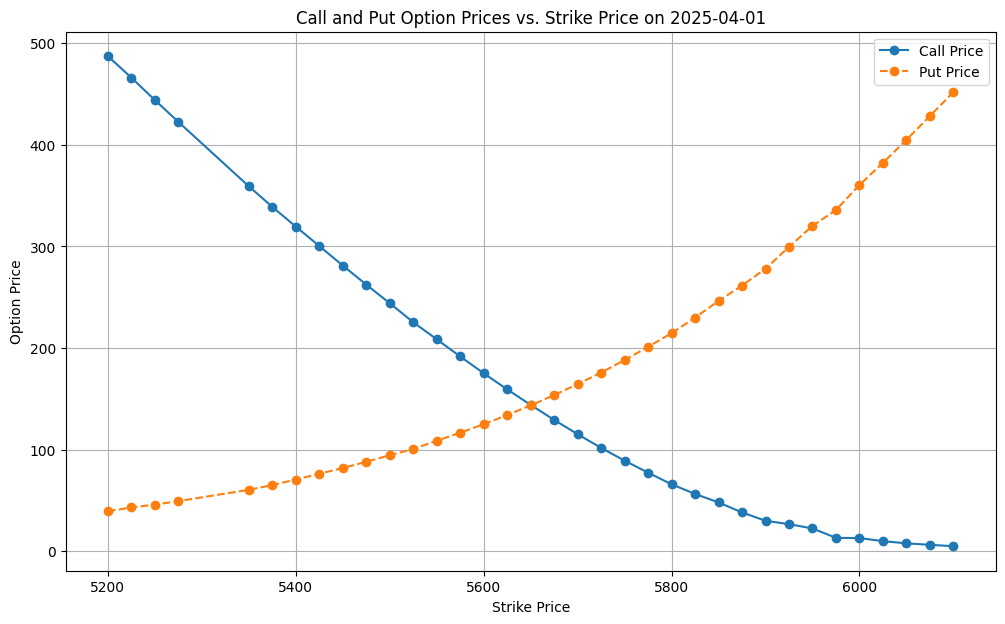

In [ ]:
# prompt: in april15options1, how would i plot call and put prices against strike on the same graph?

import matplotlib.pyplot as plt

# Sort by Strike for plotting
april1options1_sorted = april1options1.sort_values('Strike')

# Plotting Call and Put prices against Strike
plt.figure(figsize=(12, 7))

plt.plot(april1options1_sorted['Strike'], april1options1_sorted['Call'], marker='o', linestyle='-', label='Call Price')
plt.plot(april1options1_sorted['Strike'], april1options1_sorted['Put'], marker='o', linestyle='--', label='Put Price')

plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Call and Put Option Prices vs. Strike Price on 2025-04-01')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: for call options in april1options1, how do i check whether convexity argument holds ie C(K1) - 2*C(K2) + C(K3) > 0, and if this is < 0 show me the violations

import pandas as pd
# Check convexity condition for april1options1: C(K1) - 2*C(K2) + C(K3) >= 0
# We need to iterate through possible sets of three strikes with equal spacing

violations_convexity_april1 = []

# Iterate through the sorted DataFrame to find sets of three strikes
for i in range(len(april1options1_sorted) - 2):
    k1_row = april1options1_sorted.iloc[i]
    k2_row = april1options1_sorted.iloc[i + 1]
    k3_row = april1options1_sorted.iloc[i + 2]

    k1 = k1_row['Strike']
    k2 = k2_row['Strike']
    k3 = k3_row['Strike']

    # Check if the strikes have equal spacing
    if (k2 - k1) == (k3 - k2) and (k2 - k1 > 0): # Ensure positive spacing
        c1 = k1_row['Call']
        c2 = k2_row['Call']
        c3 = k3_row['Call']

        convexity_value = c1 - 2 * c2 + c3

        # Check for violation (Convexity condition for calls is C(K1) - 2C(K2) + C(K3) >= 0)
        if convexity_value < 0:
            violations_convexity_april1.append({
                'Date': k1_row['Date'],
                'K1': k1,
                'K2': k2,
                'K3': k3,
                'Call_K1': c1,
                'Call_K2': c2,
                'Call_K3': c3,
                'Convexity_Value': convexity_value
            })

# Convert violations to a DataFrame for better presentation
violations_convexity_april1_df = pd.DataFrame(violations_convexity_april1)

# Show violations
if violations_convexity_april1_df.empty:
    print("\nNo convexity violations found for equally spaced strikes on 2025-04-01.")
else:
    print("\nConvexity violations found for equally spaced strikes on 2025-04-01 (C(K1) - 2*C(K2) + C(K3) < 0):")
    print(violations_convexity_april1_df[['Date', 'K1', 'K2', 'K3', 'Call_K1', 'Call_K2', 'Call_K3', 'Convexity_Value']])




Convexity violations found for equally spaced strikes on 2025-04-01 (C(K1) - 2*C(K2) + C(K3) < 0):
        Date    K1    K2    K3     Call_K1     Call_K2     Call_K3  \
0 2025-04-01  5200  5225  5250  487.286956  466.142552  444.066024   
1 2025-04-01  5475  5500  5525  262.406486  244.105461  225.395945   
2 2025-04-01  5525  5550  5575  225.395945  208.591742  191.657534   
3 2025-04-01  5825  5850  5875   56.354023   47.966111   38.148999   
4 2025-04-01  5900  5925  5950   29.935793   26.596805   22.351283   
5 2025-04-01  5925  5950  5975   26.596805   22.351283   13.115799   
6 2025-04-01  5975  6000  6025   13.115799   12.876653    9.886075   
7 2025-04-01  6050  6075  6100    7.649453    6.255237    4.855978   

   Convexity_Value  
0        -0.932125  
1        -0.408491  
2        -0.130005  
3        -1.429200  
4        -0.906534  
5        -4.989962  
6        -2.751432  
7        -0.005043  


In [ ]:
# Check convexity condition for put options in april1options1: P(K1) - 2*P(K2) + P(K3) >= 0
# We need to iterate through possible sets of three strikes with equal spacing

violations_put_convexity_april1 = []

# Iterate through the sorted DataFrame to find sets of three strikes
for i in range(len(april1options1_sorted) - 2):
    k1_row = april1options1_sorted.iloc[i]
    k2_row = april1options1_sorted.iloc[i + 1]
    k3_row = april1options1_sorted.iloc[i + 2]

    k1 = k1_row['Strike']
    k2 = k2_row['Strike']
    k3 = k3_row['Strike']

    # Check if the strikes have equal spacing and positive spacing
    if (k2 - k1) == (k3 - k2) and (k2 - k1 > 0):
        p1 = k1_row['Put']
        p2 = k2_row['Put']
        p3 = k3_row['Put']

        convexity_value = p1 - 2 * p2 + p3

        # Check for violation (Convexity condition for puts is P(K1) - 2P(K2) + P(K3) >= 0)
        if convexity_value < 0:
            violations_put_convexity_april1.append({
                'Date': k1_row['Date'],
                'K1': k1,
                'K2': k2,
                'K3': k3,
                'Put_K1': p1,
                'Put_K2': p2,
                'Put_K3': p3,
                'Convexity_Value': convexity_value
            })

# Convert violations to a DataFrame for better presentation
violations_put_convexity_april1_df = pd.DataFrame(violations_put_convexity_april1)

# Show violations
if violations_put_convexity_april1_df.empty:
    print("\nNo put convexity violations found for equally spaced strikes on 2025-04-01 (P(K1) - 2*P(K2) + P(K3) < 0).")
else:
    print("\nPut convexity violations found for equally spaced strikes on 2025-04-01 (P(K1) - 2*P(K2) + P(K3) < 0):")
    print(violations_put_convexity_april1_df[['Date', 'K1', 'K2', 'K3', 'Put_K1', 'Put_K2', 'Put_K3', 'Convexity_Value']])


Put convexity violations found for equally spaced strikes on 2025-04-01 (P(K1) - 2*P(K2) + P(K3) < 0):
        Date    K1    K2    K3      Put_K1      Put_K2      Put_K3  \
0 2025-04-01  5200  5225  5250   39.320171   43.037453   45.822611   
1 2025-04-01  5475  5500  5525   87.918241   94.478902  100.631071   
2 2025-04-01  5525  5550  5575  100.631071  108.688554  116.616031   
3 2025-04-01  5825  5850  5875  229.929374  246.403147  261.447721   
4 2025-04-01  5900  5925  5950  278.096200  299.618898  320.235061   
5 2025-04-01  5925  5950  5975  299.618898  320.235061  335.861262   
6 2025-04-01  5975  6000  6025  335.861262  360.483802  382.354909   
7 2025-04-01  6050  6075  6100  404.979972  428.447442  451.909869   

   Convexity_Value  
0        -0.932125  
1        -0.408491  
2        -0.130005  
3        -1.429200  
4        -0.906534  
5        -4.989962  
6        -2.751432  
7        -0.005043  


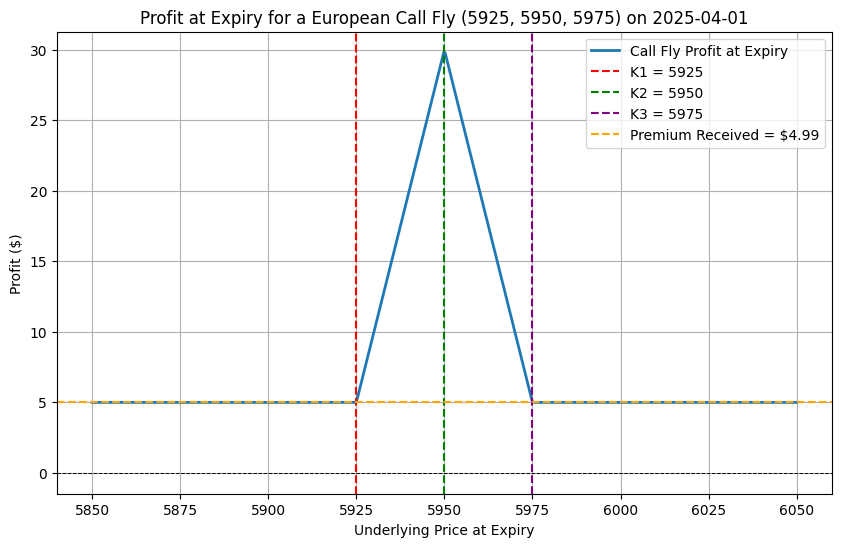

In [ ]:
k1 = 5925
k2 = 5950
k3 = 5975

# Filter the options data for the specific date and strikes
april1_options_fly = april1options1[
    april1options1['Strike'].isin([k1, k2, k3])
].copy()

# Get the call prices for the specific strikes
call_k1 = april1_options_fly[april1_options_fly['Strike'] == k1]['Call'].iloc[0]
call_k2 = april1_options_fly[april1_options_fly['Strike'] == k2]['Call'].iloc[0]
call_k3 = april1_options_fly[april1_options_fly['Strike'] == k3]['Call'].iloc[0]

prem = violations_convexity_april1_df.iloc[5,-1]

# Define a range of possible underlying prices at expiry
S = np.linspace(5850, 6050, 500)

payoff = np.maximum(S - k1, 0) - 2 * np.maximum(S - k2, 0) + np.maximum(S - k3, 0)
profit = payoff - prem

# Plotting the profit diagram
plt.figure(figsize=(10, 6))
plt.plot(S, profit, label='Call Fly Profit at Expiry',lw=2) # although not continuous ? may want to change

plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Profit ($)')
plt.title(f'Profit at Expiry for a European Call Fly ({k1}, {k2}, {k3}) on 2025-04-01')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Add a line at zero profit

# Add vertical lines for the strikes
plt.axvline(k1, color='red', linestyle='dashed', label=f'K1 = {k1}')
plt.axvline(k2, color='green', linestyle='dashed', label=f'K2 = {k2}')
plt.axvline(k3, color='purple', linestyle='dashed', label=f'K3 = {k3}')

# Add horizontal line for the max profit (at K2)
# Max profit = payoff at K2 - premium = (0 - 0 + 0) - premium = -premium_paid
plt.axhline(-prem, color='orange', linestyle='dashed', label=f'Premium Received = ${-round(prem, 2)}')
plt.legend()
plt.show()

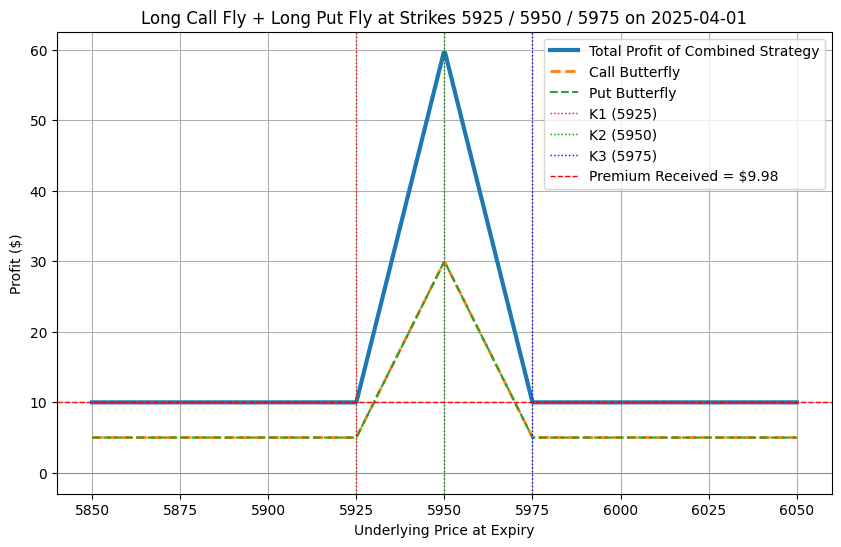

In [ ]:
# Define strike prices
K1 = 5925
K2 = 5950
K3 = 5975

# Define stock price range at expiry
S = np.linspace(5850, 6050, 500)

prem = violations_convexity_april1_df.iloc[5,-1]

# Define call and put butterfly payoff functions
def call_fly_profit(S, K1, K2, K3):
    return np.maximum(S - K1, 0) - 2 * np.maximum(S - K2, 0) + np.maximum(S - K3, 0) - prem

def put_fly_profit(S, K1, K2, K3):
    return np.maximum(K1 - S, 0) - 2 * np.maximum(K2 - S, 0) + np.maximum(K3 - S, 0) - prem

# Total payoff
total_payoff = np.maximum(S - K1, 0) - 2 * np.maximum(S - K2, 0) + np.maximum(S - K3, 0) +  np.maximum(K1 - S, 0) - 2 * np.maximum(K2 - S, 0) + np.maximum(K3 - S, 0)

profit = total_payoff - prem*2

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, profit, label="Total Profit of Combined Strategy",lw = 3)
plt.plot(S, call_fly_profit(S, K1, K2, K3), label='Call Butterfly', linestyle='--',lw=2)
plt.plot(S, put_fly_profit(S, K1, K2, K3), label='Put Butterfly', linestyle='--')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(K1, color='red', linestyle=':', linewidth=1, label='K1 (5925)')
plt.axvline(K2, color='green', linestyle=':', linewidth=1, label='K2 (5950)')
plt.axvline(K3, color='blue', linestyle=':', linewidth=1, label='K3 (5975)')
plt.title('Long Call Fly + Long Put Fly at Strikes 5925 / 5950 / 5975 on 2025-04-01')
plt.xlabel('Underlying Price at Expiry')
plt.axhline(-prem*2, color='red', linestyle='dashed', label=f'Premium Received = ${-round(prem*2, 2)}',lw=1)
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ST < 5925. (K1 - ST) - 2*(K2 - ST) + (K3 - ST) = K1 - 2K2 + K3 = 0
#5925 < ST < 5950. (ST - K1) - 2*(K2 - ST) + (K3 - ST) = ST - K1 - 2*K2 + 2ST + K3 - ST = 2ST - 11850 = 2(ST - K1)
# 5950 < ST < 5975. ST - K1 - 2*(ST - K2) + (K3 - ST) = -K1 + 2K2 + K3 = 11950 - 2ST = 2(K3 - ST)
# ST > 5925. ST - K1 - 2*(ST - K2) + (ST - K3) = - K1 + 2*K2 - K3 = 0

np.float64(9.979923482187395)

In [ ]:
# Strike prices
K1, K2, K3 = 5925, 5950, 5975

# Generate discrete price points at expiry
stock_prices = np.arange(5850, 6051, 25)

# Compute payoffs
call_payoff = np.maximum(stock_prices - K1, 0) - 2 * np.maximum(stock_prices - K2, 0) + np.maximum(stock_prices - K3, 0)
put_payoff = np.maximum(K1 - stock_prices, 0) - 2 * np.maximum(K2 - stock_prices, 0) + np.maximum(K3 - stock_prices, 0)
total_payoff = call_payoff + put_payoff

# Create a DataFrame for display
payoff_table = pd.DataFrame({
    'Stock Price at Expiry': stock_prices,
    'Call Butterfly Payoff': call_payoff,
    'Put Butterfly Payoff': put_payoff,
    'Total Payoff': total_payoff
})

print(payoff_table)

   Stock Price at Expiry  Call Butterfly Payoff  Put Butterfly Payoff  \
0                   5850                      0                     0   
1                   5875                      0                     0   
2                   5900                      0                     0   
3                   5925                      0                     0   
4                   5950                     25                    25   
5                   5975                      0                     0   
6                   6000                      0                     0   
7                   6025                      0                     0   
8                   6050                      0                     0   

   Total Payoff  
0             0  
1             0  
2             0  
3             0  
4            50  
5             0  
6             0  
7             0  
8             0  


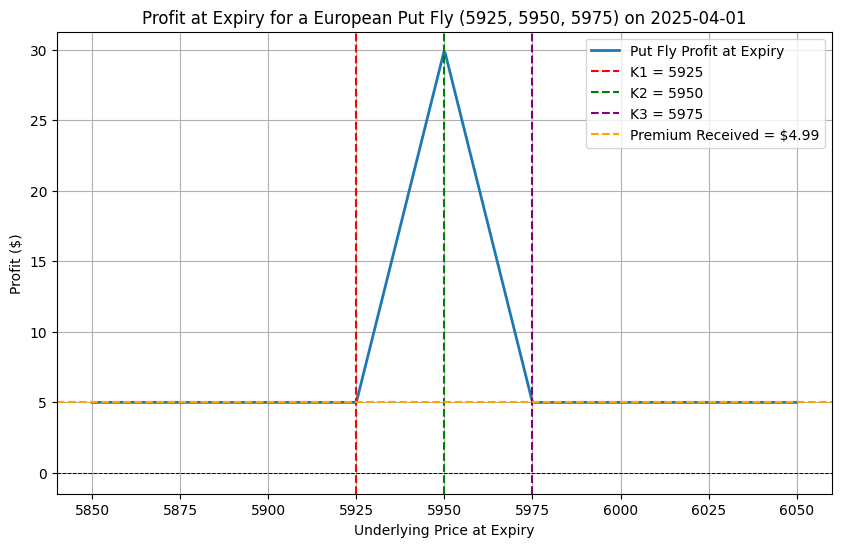

In [ ]:
# put fly

k1 = 5925
k2 = 5950
k3 = 5975

# Filter the options data for the specific date and strikes
april1_options_fly = april1options1[
    april1options1['Strike'].isin([k1, k2, k3])
].copy()

# Get the call prices for the specific strikes
put_k1 = april1_options_fly[april1_options_fly['Strike'] == k1]['Put'].iloc[0]
put_k2 = april1_options_fly[april1_options_fly['Strike'] == k2]['Put'].iloc[0]
put_k3 = april1_options_fly[april1_options_fly['Strike'] == k3]['Put'].iloc[0]

prem = violations_convexity_april1_df.iloc[5,-1]

# Define a range of possible underlying prices at expiry
S = np.linspace(5850, 6050, 500)

payoff = np.maximum(k1 - S, 0) - 2 * np.maximum(k2 - S, 0) + np.maximum(k3 - S, 0)
profit = payoff - prem

# Plotting the profit diagram
plt.figure(figsize=(10, 6))
plt.plot(S, profit, label='Put Fly Profit at Expiry',lw=2) # although not continuous ? may want to change

plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Profit ($)')
plt.title(f'Profit at Expiry for a European Put Fly ({k1}, {k2}, {k3}) on 2025-04-01')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Add a line at zero profit

# Add vertical lines for the strikes
plt.axvline(k1, color='red', linestyle='dashed', label=f'K1 = {k1}')
plt.axvline(k2, color='green', linestyle='dashed', label=f'K2 = {k2}')
plt.axvline(k3, color='purple', linestyle='dashed', label=f'K3 = {k3}')

# Add horizontal line for the max profit (at K2)
# Max profit = payoff at K2 - premium = (0 - 0 + 0) - premium = -premium_paid
plt.axhline(-prem, color='orange', linestyle='dashed', label=f'Premium Received = ${-round(prem, 2)}')
plt.legend()
plt.show()